In [1]:
import csv
from datetime import datetime
from tabulate import tabulate
import matplotlib.pyplot as plt
import folium
import math
import numpy as np

### 1. What datetime range does your data cover?  How many rows are there total?

In [15]:
with open('trip_data_10.csv', 'r') as file:
    reader = csv.reader(file)
    row_count = 0
    skip_count=0
    pickup_mindate = None
    pickup_maxdate = None
    dropoff_mindate = None
    dropoff_maxdate = None

    for row in reader:
        if row_count == 0:    
            row_count=+1                   
            continue
       
        dts1 = row[5]
        dto1 = None
        dts2 = row[6]
        dto2 = None
        
        try:
           
            dto1 = datetime.strptime(dts1, "%Y-%m-%d %H:%M:%S") if dts1 else None
            dto2 = datetime.strptime(dts2, "%Y-%m-%d %H:%M:%S") if dts2 else None
        except Exception as e:
            print(f'Error parsing date: {e}')

        
        if dto1 is not None:
            if pickup_mindate is None or pickup_mindate > dto1:
                pickup_mindate = dto1
            if pickup_maxdate is None or pickup_maxdate < dto1:
                pickup_maxdate = dto1
        
       
        if dto2 is not None:
            if dropoff_mindate is None or dropoff_mindate > dto2:
                dropoff_mindate = dto2
            if dropoff_maxdate is None or dropoff_maxdate < dto2:
                dropoff_maxdate = dto2

        row_count += 1

  
    tabular_data = [
        ["Pickup Datetime Range", f"{pickup_mindate} to {pickup_maxdate}"],
        ["Dropoff Datetime Range", f"{dropoff_mindate} to {dropoff_maxdate}"],
        ["Row count including header", row_count-1]
    ]

    print(tabulate(tabular_data, ["Attribute", "Value"],tablefmt="grid"))

+----------------------------+--------------------------------------------+
| Attribute                  | Value                                      |
+============================+============================================+
| Pickup Datetime Range      | 2013-10-01 00:00:00 to 2013-10-31 23:59:59 |
+----------------------------+--------------------------------------------+
| Dropoff Datetime Range     | 2013-10-01 00:00:00 to 2013-11-01 03:17:34 |
+----------------------------+--------------------------------------------+
| Row count including header | 15004556                                   |
+----------------------------+--------------------------------------------+


### 3. Give some sample data for each field.

In [42]:
with open('trip_data_10.csv', 'r') as file:
    reader = csv.reader(file)
    header = next(reader)
    data = next(reader)
table = tabulate({"Field Names": header, "Sample Data": data},"keys","grid")

print(table)

+--------------------+----------------------------------+
| Field Names        | Sample Data                      |
+====================+==================================+
| medallion          | 740BD5BE61840BE4FE3905CC3EBE3E7E |
+--------------------+----------------------------------+
| hack_license       | E48B185060FB0FF49BE6DA43E69E624B |
+--------------------+----------------------------------+
| vendor_id          | CMT                              |
+--------------------+----------------------------------+
| rate_code          | 1                                |
+--------------------+----------------------------------+
| store_and_fwd_flag | N                                |
+--------------------+----------------------------------+
| pickup_datetime    | 2013-10-01 12:44:29              |
+--------------------+----------------------------------+
| dropoff_datetime   | 2013-10-01 12:53:26              |
+--------------------+----------------------------------+
| passenger_co

### 5. What is the geographic range of your data (min/max - X/Y)?

In [8]:
def remove_outliers(data): 
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    outlier_min = Q1 - 1.5 * IQR
    outlier_max = Q3 + 1.5 * IQR

    return [x for x in data if outlier_min <= x <= outlier_max]


latitude_min = -90
latitude_max = 90
longitude_min = -180
longitude_max = 180

longitude_list=[]
latitude_list=[]

with open('trip_data_10.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader) 
    row_count=0
    for row in reader:
        try:          
            pickup_longitude=float(row[10]) if row[10] else None
            pickup_latitude=float(row[11]) if row[11] else None

            dropoff_longitude=float(row[12]) if row[12] else None
            dropoff_latitude=float(row[13]) if row[13] else None
            
      
            if pickup_latitude is not None and pickup_longitude is not None and dropoff_longitude is not None and dropoff_latitude is not None:
                if (latitude_min <= pickup_latitude <= latitude_max and longitude_min <= pickup_longitude <= longitude_max and
                    latitude_min <= dropoff_latitude <= latitude_max and longitude_min <= dropoff_longitude <= longitude_max):
                    latitude_list.append(pickup_latitude)
                    longitude_list.append(pickup_longitude)
                    latitude_list.append(dropoff_latitude)
                    longitude_list.append(dropoff_longitude)
                        
            row_count+=1
           

        except ValueError:
            continue # skipping those that do not have a valid value 

print(len(longitude_list))
print(len(latitude_list))

cleaned_longitude_list=remove_outliers(longitude_list)
cleaned_latitude_list=remove_outliers(latitude_list)

min_latitude=min(cleaned_latitude_list)
max_latitude=max(cleaned_latitude_list)

min_longitude=min(cleaned_longitude_list)
max_longitude=max(cleaned_longitude_list)

center_lat = (min_latitude + max_latitude) / 2
center_lon = (min_longitude + max_longitude) / 2


map = folium.Map(location=[center_lat, center_lon])


bounding_box = [
    (min_latitude, min_longitude) ,
    (max_latitude, min_longitude),  
    (max_latitude, max_longitude),  
    (min_latitude, max_longitude),  
    (min_latitude, min_longitude),  
]

folium.Polygon(
        locations=bounding_box,
        color='orange',
        fill=True,
        fill_color='gray'
    ).add_to(map)

map.fit_bounds(bounding_box)    

tabular_data = [
        ["Longitute Range", min_longitude , max_longitude],
        ["Latitude Range", min_latitude , max_latitude]
    ]

print(tabulate(tabular_data, ["Attribute", "Min Value", "Max Value"],tablefmt="grid"))

map.save("map.html")
map

30007610
30007610
+-----------------+-------------+-------------+
| Attribute       |   Min Value |   Max Value |
+=================+=============+=============+
| Longitute Range |    -74.0312 |    -73.9263 |
+-----------------+-------------+-------------+
| Latitude Range  |     40.6843 |     40.8182 |
+-----------------+-------------+-------------+


### 6. What is the average overall computed trip distance? (You should use Haversine Distance)


The average trip distance is: 10.252114787644716 miles


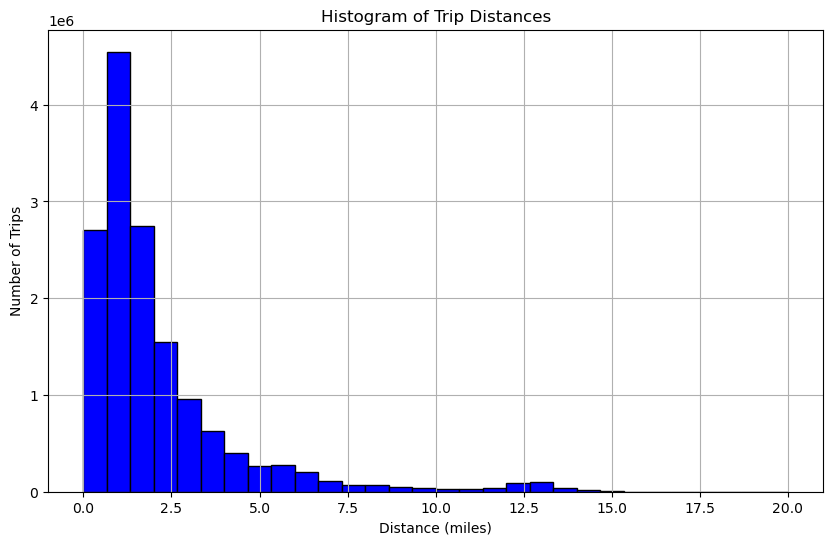

In [13]:
# stack over flow source code

def haversine(lat1, lon1, lat2, lon2):
     
      R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km

      dLat = math.radians(lat2 - lat1)
      dLon = math.radians(lon2 - lon1)
      lat1 = math.radians(lat1)
      lat2 = math.radians(lat2)

      a = math.sin(dLat/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dLon/2)**2
      c = 2*math.asin(math.sqrt(a))

      return R * c


# dustance calculation
total_distance=0
total_distance_list=[]
total_rides=0

with open('trip_data_10.csv','r') as file:
      reader=csv.reader(file)
      next(reader)
      for row in reader:
            try:
                  pickup_longitude=float(row[10]) if row[10] else None
                  pickup_latitude=float(row[11]) if row[11] else None

                  dropoff_longitude=float(row[12]) if row[12] else None
                  dropoff_latitude=float(row[13]) if row[13] else None
                  
                  if (pickup_latitude is not None and pickup_longitude is not None and
                        dropoff_latitude is not None and dropoff_longitude is not None):
                        distance=haversine(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude)
                        total_distance+=distance
                        total_distance_list.append(distance)
                        total_rides+=1                  

            except Exception as e:
                  print(f'Error : {e}')

      avg_distance=total_distance/total_rides if total_rides>0 else 0
      print(f'The average trip distance is: {avg_distance} miles')

      plt.figure(figsize=(10, 6))
      plt.hist(total_distance_list, bins=30, range=(0,20), color='blue', edgecolor='black')
      plt.title("Histogram of Trip Distances")
      plt.xlabel("Distance (miles)")
      plt.ylabel("Number of Trips")
      plt.grid(True)
      plt.show()

### 7. What are the distinct values for each field? (If applicable)

In [14]:
vendor_id = set()
rate_code = set()
store_and_fwd_flag = set()
passenger_count = set()


with open('trip_data_10.csv', 'r') as file:
    reader = csv.reader(file)
    header = next(reader)  
    for row in reader:             
        vendor_id.add(row[2])
        rate_code.add(row[3])
        store_and_fwd_flag.add(row[4])      
        passenger_count.add(row[7])
        
tabular_data = [   
    ["Vendor IDs", list(vendor_id)],
    ["Rate Codes", list(rate_code)],
    ["Store and Forward Flags", list(store_and_fwd_flag)],    
    ["Passenger Counts", list(passenger_count)]
]

print(tabulate(tabular_data, ["Attribute", "Values"],tablefmt="grid"))


+-------------------------+-----------------------------------------------------------------+
| Attribute               | Values                                                          |
+=========================+=================================================================+
| Vendor IDs              | ['VTS', 'CMT']                                                  |
+-------------------------+-----------------------------------------------------------------+
| Rate Codes              | ['210', '0', '7', '8', '2', '5', '3', '9', '28', '6', '1', '4'] |
+-------------------------+-----------------------------------------------------------------+
| Store and Forward Flags | ['', 'N', 'Y']                                                  |
+-------------------------+-----------------------------------------------------------------+
| Passenger Counts        | ['0', '7', '2', '5', '3', '9', '6', '1', '4']                   |
+-------------------------+---------------------------------

### 8. For other numeric types besides lat and lon, what are the min and max values?

In [48]:
with open('trip_data_10.csv', 'r') as file:
    reader = csv.reader(file)
    header = next(reader)  
    rate_code_list=[]
    passenger_count_list=[]
    trip_time_in_secs_list=[]
    trip_distance_list=[]


    for row in reader:
        rate_code_list.append(row[3])
        passenger_count_list.append(row[7])
        trip_time_in_secs_list.append(row[8])
        trip_distance_list.append(row[9])
    

tabular_data = [
    ["rate_code", min(rate_code_list),max(rate_code_list)],
    ["passenger_count",  min(passenger_count_list),max(passenger_count_list)],
    ["trip_time_in_secs", min(trip_time_in_secs_list),max(trip_time_in_secs_list)],
    ["trip_distance", min(trip_distance_list),max(trip_distance_list)]   
]
print(tabulate(tabular_data, ["Attribute", "Min Value", "Max Value"],tablefmt="grid"))

+-------------------+-------------+-------------+
| Attribute         |   Min Value |   Max Value |
+===================+=============+=============+
| rate_code         |           0 |         9   |
+-------------------+-------------+-------------+
| passenger_count   |           0 |         9   |
+-------------------+-------------+-------------+
| trip_time_in_secs |           0 |      9999   |
+-------------------+-------------+-------------+
| trip_distance     |           0 |        99.2 |
+-------------------+-------------+-------------+


### 9. Create a chart which shows the average number of passengers each hour of the day. (X axis should have 24 hours)


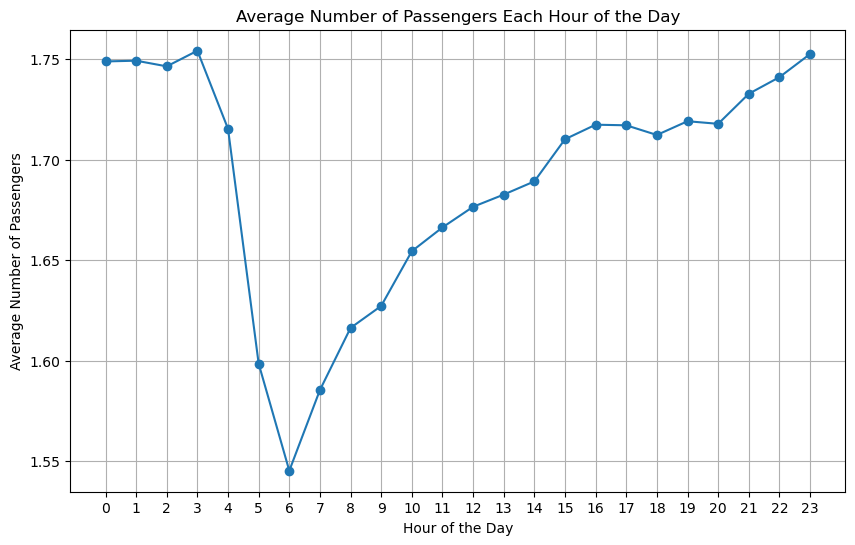

In [16]:
passenger_per_hr_count={h:[] for h in range(24)}
with open('trip_data_10.csv', 'r') as file:
    reader = csv.reader(file)
    header = next(reader) 
    for row in reader:
        try:
            dts=row[5]
            dto1 = datetime.strptime(dts, "%Y-%m-%d %H:%M:%S") if dts else None
            dto1_hr=dto1.hour
            passenger_cnt=int(row[7])
            passenger_per_hr_count[dto1_hr].append(passenger_cnt)

        except Exception as e:            
            continue

avg_per_hr=[]
for h in range(24):
    if passenger_per_hr_count[h]:
        avg_per_hr.append(sum(passenger_per_hr_count[h])/len(passenger_per_hr_count[h]))
    else:
        avg_per_hr.append(0)
    
plt.figure(figsize=(10 ,6))
plt.plot(range(24), avg_per_hr, marker='o')
plt.xticks(range(24))
plt.title('Average Number of Passengers Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Passengers')
plt.grid(True)
plt.show()

### 10. Create a new CSV file which has only one out of every thousand rows.

In [19]:
with open('trip_data_10.csv','r') as file , open('shorter_trip_data_10.csv','w') as file2:
    reader=csv.reader(file)
    writer=csv.writer(file2)
    row_count=0

    header=next(reader)
    writer.writerow(header)

    for row in reader:
        if row_count % 1000 ==0:
            writer.writerow(row)            
        row_count+=1

print("new compressed trip_data_10.csv file is created")
print(row_count)

new compressed trip_data_10.csv file is created
15004556


### 11. Repeat step 9 with the reduced dataset and compare the two charts

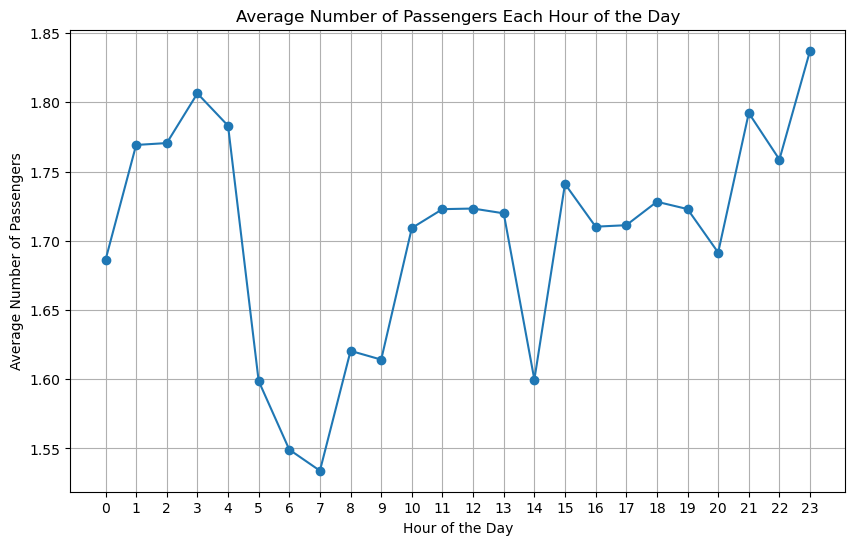

In [20]:
passenger_per_hr_count={h:[] for h in range(24)}
with open('shorter_trip_data_10.csv', 'r') as file:
    reader = csv.reader(file)
    header = next(reader) 
    for row in reader:
        try:
            dts=row[5]
            dto1 = datetime.strptime(dts, "%Y-%m-%d %H:%M:%S") if dts else None
            dto1_hr=dto1.hour
            passenger_cnt=int(row[7])
            passenger_per_hr_count[dto1_hr].append(passenger_cnt)

        except Exception as e:            
            continue

avg_per_hr=[]
for h in range(24):
    if passenger_per_hr_count[h]:
        avg_per_hr.append(sum(passenger_per_hr_count[h])/len(passenger_per_hr_count[h]))
    else:
        avg_per_hr.append(0)
    
plt.figure(figsize=(10 ,6))
plt.plot(range(24), avg_per_hr, marker='o')
plt.xticks(range(24))
plt.title('Average Number of Passengers Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Passengers')
plt.grid(True)
plt.show()